______________
<font color = blue size = 12><center> **Book Rating - Recommender**</font>

    
    
<font  size = 3><center> ***Machine Learning Big Data Project***


    



<font  size = 3><center>**Author:** [Camila Maestrelli](https://www.linkedin.com/in/camila-maestrelli-leobons/)
    
    
______

A proposta desse trabalho é processar e analisar dados utilizando tecnologias de Big Data.
Com base nos dados de sua escolha, elabore um desenho claro de qual o problema de
negócio e como a sua solução analítica resolve o problema.
Você vai definir todas as etapas da análise: o objetivo, as hipóteses que serão validadas,
como o dado será transformado para responder as suas perguntas e a maneira de dispor
os resultados.
Para auxiliá-lo, responda cada uma dessas questões abaixo e entregue estas respostas
juntamente ao seu notebook, contendo o código da análise executada.
▪          Descreva o problema ou a dor de negócio que você quer explorar na sua análise.
▪          Quais dados você tem disponível para a análise?
▪          Que hipóteses você pretende validar?
▪          O que você pode concluir de cada uma das análises?
Caso opte por construir uma solução de Machine Learning utilizando PySpark, segue mais
algumas perguntas para lhe auxiliar:
▪          Como o modelo será utilizado pelo negócio?
▪          Como você avaliou a eficácia do seu modelo?
▪          Como você avaliará os benefícios do modelo depois que ele for implantado?
No projeto, a escolha do desafio é de vocês, a única condição é que seja utilizado as
tecnologias de Big Data apresentada a vocês.

## <code style="background:lightgray;color:green">1. Definição do problema</code>

Os leitores têm um problema de não saber se o livro que está lendo é bom até depois de começar a ler. Dessa forma, baseado nos padrões do leitor em relação aos livros avalidos, pode-se criar um recomendador baseado nos livros já avaliados e avaliações de outros leitores para chegar a uma recomendação mais precisa.


### <code style="background:yellow;color:red">**Visualização em grafos**</code>

usuário sendo nó com aresta sendo numero de livros em comum
livro como nó sendo aresta numero de usuários em comum

Quanto mais livros/usuários, menor a aresta

Quanto mais livros/usuários, maior o nó

## Entendimento dos dados

**Perguntas**

1. Quantos livros existem na base?
2. Quantos livros por editora?
3. Qual a proporção de livros com avaliação máxima?
4. Quais livros tem a maior variação de nota mínima emáima?
5. Qual a distribuição das notas?
6. Qual a relação da nota do livro com o número de páginas?
7. Quantos livros um usuário médio avalia? Fazer grafo com usuário sendo o nó, e aresta a qtde de livros em comum
8. Quantos usuários avaliam um livro em média? Fazer grafo com livro sendo nó e aresta a qtde de usuários em comum


## Importação

In [1]:
# instalar as dependências
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz

!wget -q https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.0-s_2.12/graphframes-0.8.2-spark3.0-s_2.12.jar

!pip install -q findspark datasets graphframes networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 17.5 MB/s eta 0:00:00


In [2]:
# configurar as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

# tornar o pyspark "importável"
import findspark
findspark.init('spark-3.5.0-bin-hadoop3')

In [3]:
import io
import sys
import numpy as np
import pandas as pd
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
from pyspark.sql import types as t
from pyspark import pandas as ps



SUBMIT_ARGS = "--packages graphframes:graphframes:0.8.2-spark3.0-s_2.12 pyspark-shell"
os.environ["PYSPARK_SUBMIT_ARGS"] = SUBMIT_ARGS

from graphframes import *

/content/spark-3.5.0-bin-hadoop3/python/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [4]:
import pyspark

In [5]:
pyspark.__version__

'3.5.0'

In [6]:
spark = SparkSession.builder.master('local[*]') \
                          .config("spark.jars.packages",
                                  "graphframes:graphframes:0.8.2-spark3.0-s_2.12") \
                          .config("spark.driver.memory", "9g")\
                          .getOrCreate()

sc = spark.sparkContext

In [7]:
!mkdir checkpoints
spark.sparkContext.setCheckpointDir('./checkpoints')

In [8]:
sc._conf.get('spark.driver.memory')

'9g'

In [9]:
!pip install opendatasets

In [10]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/bahramjannesarr/goodreads-book-datasets-10m?select=user_rating_0_to_1000.csv")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: camilaml86
Your Kaggle Key: ··········


100%|██████████| 460M/460M [00:21<00:00, 22.4MB/s]


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import networkx as nx


https://www.kaggle.com/code/olih1029/book-rating

In [12]:
path = '/content/goodreads-book-datasets-10m'
os.listdir(path)

['book1-100k.csv',
 'book400k-500k.csv',
 'user_rating_5000_to_6000.csv',
 'user_rating_1000_to_2000.csv',
 'user_rating_0_to_1000.csv',
 'book1700k-1800k.csv',
 'book100k-200k.csv',
 'book700k-800k.csv',
 'book800k-900k.csv',
 'user_rating_2000_to_3000.csv',
 'book2000k-3000k.csv',
 'book1300k-1400k.csv',
 'book600k-700k.csv',
 'book1600k-1700k.csv',
 'user_rating_3000_to_4000.csv',
 'book3000k-4000k.csv',
 'book200k-300k.csv',
 'book500k-600k.csv',
 'book1200k-1300k.csv',
 'user_rating_4000_to_5000.csv',
 'book300k-400k.csv',
 'book1400k-1500k.csv',
 'book1500k-1600k.csv',
 'book1800k-1900k.csv',
 'book900k-1000k.csv',
 'book4000k-5000k.csv',
 'book1900k-2000k.csv',
 'user_rating_6000_to_11000.csv',
 'book1100k-1200k.csv',
 'book1000k-1100k.csv']

* Nota-se 2 tipos de ados: usuário e livros.
* Dessa forma, as tabelas de usuário serão agregadas entre si e as de livros unidas também

In [13]:
import glob

## User Rating: Nota do usuário

### Lendo e juntando as tabelas

In [14]:
n = 0
for file in glob.glob("/content/goodreads-book-datasets-10m/user_rating*.csv"):
  print(file)
  if n == 0:
    user_rating = spark.read.csv(file, header = True)
    n +=1
  else:
    user_add = spark.read.csv(file, header = True)
    user_rating = user_rating.unionByName(user_add)

user_rating

/content/goodreads-book-datasets-10m/user_rating_5000_to_6000.csv
/content/goodreads-book-datasets-10m/user_rating_1000_to_2000.csv
/content/goodreads-book-datasets-10m/user_rating_0_to_1000.csv
/content/goodreads-book-datasets-10m/user_rating_2000_to_3000.csv
/content/goodreads-book-datasets-10m/user_rating_3000_to_4000.csv
/content/goodreads-book-datasets-10m/user_rating_4000_to_5000.csv
/content/goodreads-book-datasets-10m/user_rating_6000_to_11000.csv


DataFrame[ID: string, Name: string, Rating: string]

In [15]:
user_rating.show()

+----+------+--------------------+
|  ID|  Name|              Rating|
+----+------+--------------------+
|5410|Rating|This user doesn't...|
|5411|Rating|This user doesn't...|
|5412|Rating|This user doesn't...|
|5416|Rating|This user doesn't...|
|5417|Rating|This user doesn't...|
|5419|Rating|This user doesn't...|
|5420|Rating|This user doesn't...|
|5421|Rating|This user doesn't...|
|5424|Rating|This user doesn't...|
|5425|Rating|This user doesn't...|
|5427|Rating|This user doesn't...|
|5428|Rating|This user doesn't...|
|5435|Rating|This user doesn't...|
|5438|Rating|This user doesn't...|
|5439|Rating|This user doesn't...|
|5441|Rating|This user doesn't...|
|5443|Rating|This user doesn't...|
|5444|Rating|This user doesn't...|
|5449|Rating|This user doesn't...|
|5453|Rating|This user doesn't...|
+----+------+--------------------+
only showing top 20 rows



In [ ]:
user_rating.summary().show()

+-------+-----------------+--------------------+--------------------+
|summary|               ID|                Name|              Rating|
+-------+-----------------+--------------------+--------------------+
|  count|           362596|              362596|              362596|
|   mean|4910.988725744354|            Infinity|                NULL|
| stddev|3261.676702285681|                 NaN|                NULL|
|    min|                1|     !آنچه سینما هست| ""The Friends of...|
|    25%|           1982.0|              1984.0|                NULL|
|    50%|           4544.0|              1984.0|                NULL|
|    75%|           7777.0|              1984.0|                NULL|
|    max|             9999|�come Closer�: Cr...|     really liked it|
+-------+-----------------+--------------------+--------------------+



* Criando uma view

In [16]:
user_rating.createOrReplaceTempView("user_rating")

* Nota-se algumas incosistências na base:
    * a nota dos usuários aparece com alguns nomes do filme
    * Era p ter o seguinte:

      |it was amazing| incrível|
      |really liked it| gostei muito|
      - like it: gostei,
      - it was ok: ok e
      - did not like it: não gostei
      - This user doesn't have any rating: não deu nota

In [ ]:
spark.sql("""select Rating, count(*) as contagem from user_rating
                    group by Rating
                    order by count(*) desc

                                """).show()

+--------------------+--------+
|              Rating|contagem|
+--------------------+--------+
|     really liked it|  132779|
|            liked it|   96021|
|      it was amazing|   92313|
|           it was ok|   28806|
|     did not like it|    7806|
|This user doesn't...|    4765|
|                #1)"|      35|
|          1931-1932"|      19|
|    African American|       6|
| Harlequin!"" Sai...|       5|
|                #3)"|       3|
| Pioneer of the A...|       2|
|          1937-1939"|       2|
|          1932-1934"|       2|
|          1934-1937"|       2|
| But"" Thinking a...|       2|
|                #2)"|       2|
|        Bessie Smith|       1|
|        For Example"|       1|
| La. (1936-1940 ;...|       1|
+--------------------+--------+
only showing top 20 rows



In [ ]:
spark.sql("""select distinct(Name) from user_rating
                                """).show()

+--------------------+
|                Name|
+--------------------+
|A Blind Man Can S...|
|The Berlin Storie...|
|       The Curiosity|
|Submersion Journa...|
|Emergency: This B...|
|      The Dressmaker|
|Before I Go to Sleep|
|        Pain Fantasy|
|Subwayland: Adven...|
|The Limpopo Acade...|
|   The Tummy Trilogy|
|The Good Husband ...|
| A Room of One's Own|
|   سگ کشی، فیلم‌نامه|
|               تقسیم|
|Regensburg - A Sh...|
|Talking to Girls ...|
|      Doctor Faustus|
|                مادر|
| Love and Friendship|
+--------------------+
only showing top 20 rows



### Limpeza dos dados

* Retirando o usuário que não deu nota a nenhum livro

In [17]:
novo_user_rating = spark.sql("""select * from user_rating
                                where Rating == "it was amazing" or
                                      Rating == "really liked it" or
                                      Rating == "liked it" or
                                      Rating == "it was ok" or
                                      Rating == "did not like it"
                                """)
novo_user_rating.show()

+----+---------------+---------------+
|  ID|           Name|         Rating|
+----+---------------+---------------+
|5433|Of Mice and Men|really liked it|
|5473|Of Mice and Men|really liked it|
|5491|Of Mice and Men|       liked it|
|5499|Of Mice and Men|       liked it|
|5527|Of Mice and Men|       liked it|
|5674|Of Mice and Men|really liked it|
|5691|Of Mice and Men| it was amazing|
|5692|Of Mice and Men| it was amazing|
|5695|Of Mice and Men|really liked it|
|5700|Of Mice and Men|really liked it|
|5739|Of Mice and Men| it was amazing|
|5791|Of Mice and Men|      it was ok|
|5795|Of Mice and Men|       liked it|
|5808|Of Mice and Men| it was amazing|
|5812|Of Mice and Men|       liked it|
|5865|Of Mice and Men|      it was ok|
|5886|Of Mice and Men| it was amazing|
|5899|Of Mice and Men|really liked it|
|5954|Of Mice and Men|really liked it|
|5962|Of Mice and Men| it was amazing|
+----+---------------+---------------+
only showing top 20 rows



In [18]:
novo_user_rating.createOrReplaceTempView("novo_user_rating")

* Observando se existentes valores vazios, nulos

In [ ]:
novo_user_rating.select([f.count(f.when( \
                            f.col(c).contains('NULL') | \
                            (f.col(c) == '' ) | \
                            f.col(c).isNull() | \
                            f.isnan(c), c
                           )).alias(c)
                    for c in novo_user_rating.columns]).show()

+---+----+------+
| ID|Name|Rating|
+---+----+------+
|  0|   0|     0|
+---+----+------+



In [ ]:
novo_user_rating.summary().show()

+-------+-----------------+--------------------+---------------+
|summary|               ID|                Name|         Rating|
+-------+-----------------+--------------------+---------------+
|  count|           357725|              357725|         357725|
|   mean|4901.262506115033|            Infinity|           NULL|
| stddev|3261.398072036034|                 NaN|           NULL|
|    min|                1|     !آنچه سینما هست|did not like it|
|    25%|           1982.0|              1984.0|           NULL|
|    50%|           4542.0|              1984.0|           NULL|
|    75%|           7774.0|              1984.0|           NULL|
|    max|             9997|�come Closer�: Cr...|really liked it|
+-------+-----------------+--------------------+---------------+



* Nota-se que, na sua grande parte, os usuários gostaram dos livros que avaliaram

In [ ]:
spark.sql("""select Rating, count(*) as contagem from novo_user_rating
                    group by Rating
                    order by count(*) desc

                                """).show()

+---------------+--------+
|         Rating|contagem|
+---------------+--------+
|really liked it|  132779|
|       liked it|   96021|
| it was amazing|   92313|
|      it was ok|   28806|
|did not like it|    7806|
+---------------+--------+



* Dentro da nossa amostra, o maior número de avaliações feitas por 1 ID foi de 3636. Por outro lado, o menor é 1 e a mediana 23.

In [ ]:
spark.sql("""select ID, Count(*) from novo_user_rating
                    group by ID

                                """).summary().show()

+-------+------------------+------------------+
|summary|                ID|          count(1)|
+-------+------------------+------------------+
|  count|              4154|              4154|
|   mean| 5227.327876745306| 86.11579200770342|
| stddev|3301.3717704801447|187.85871941413617|
|    min|                 1|                 1|
|    25%|            2347.0|                 5|
|    50%|            4869.0|                23|
|    75%|            8329.0|                83|
|    max|              9997|              3636|
+-------+------------------+------------------+



* Observando as notas feitas pelos usuários que fizeram mais de 23 avaliações:
  - não diferente dos outros usuários, aqueles com mais de 23 avaliações também gostaram da maioria dos livros que avaliaram

In [ ]:
spark.sql("""with users as (select ID, Count(*)
                            from novo_user_rating
                            group by ID
                            having Count(*)>23)

                           select Rating, count(ID) from novo_user_rating
                              where ID in (select ID from users)
                              group by Rating
                              order by count(ID) desc
                                """).show()


+---------------+---------+
|         Rating|count(ID)|
+---------------+---------+
|really liked it|   127566|
|       liked it|    93096|
| it was amazing|    86298|
|      it was ok|    28070|
|did not like it|     7491|
+---------------+---------+



* Nota-se que grande parte dos livros obtiveram poucas avaliações.
* 25% da amostra tem ~ mais de 2 avaliações

In [ ]:
spark.sql("""select Name, Count(*) from novo_user_rating
                    group by Name


                            """).summary().show()

+-------+--------------------+------------------+
|summary|                Name|          count(1)|
+-------+--------------------+------------------+
|  count|              103492|            103492|
|   mean|            Infinity|3.4565473659799792|
| stddev|                 NaN|15.687723910872204|
|    min|     !آنچه سینما هست|                 1|
|    25%|                69.0|                 1|
|    50%|              1808.0|                 1|
|    75%|              1942.0|                 2|
|    max|�come Closer�: Cr...|               985|
+-------+--------------------+------------------+



* Queremos apenas os livros que foram avaliados ao menos 2 X : um total de 30.025 livros foramavaliados pelo menos 2 vezes

In [ ]:
livros = spark.sql("""select Name, Count(*) from novo_user_rating
                    group by Name
                    having Count(*)>=2

                            """).select('Name').distinct().toPandas()['Name']

livros

0                  A Blind Man Can See How Much I Love You
1        The Berlin Stories: The Last of Mr Norris/Good...
2        Submersion Journalism: Reporting in the Radica...
3                 Emergency: This Book Will Save Your Life
4                                           The Dressmaker
                               ...                        
34020          A Brief History of Anxiety...Yours and Mine
34021                  Vampire Loves (Grand Vampire, #1-4)
34022                                  El rumor del oleaje
34023                                 Atmosphæra Incognita
34024                             Âme rouge (Blacksad, #3)
Name: Name, Length: 34025, dtype: object

In [ ]:
livros[1]

'The Berlin Stories: The Last of Mr Norris/Goodbye to Berlin'

* Atribuindo uma nota (numérica) para a avaliação do livro

In [19]:
novo_user_rating = spark.sql("""select * ,
                    case
                        when Rating == "it was amazing" then 5
                        when Rating == "really liked it" then 4
                        when Rating == "liked it" then 3
                        when Rating == "it was ok" then 2
                        when Rating == "did not like it" then 1
                        else 0
                    end as Nota
                    from novo_user_rating


                                """)

novo_user_rating.show()

+----+---------------+---------------+----+
|  ID|           Name|         Rating|Nota|
+----+---------------+---------------+----+
|5433|Of Mice and Men|really liked it|   4|
|5473|Of Mice and Men|really liked it|   4|
|5491|Of Mice and Men|       liked it|   3|
|5499|Of Mice and Men|       liked it|   3|
|5527|Of Mice and Men|       liked it|   3|
|5674|Of Mice and Men|really liked it|   4|
|5691|Of Mice and Men| it was amazing|   5|
|5692|Of Mice and Men| it was amazing|   5|
|5695|Of Mice and Men|really liked it|   4|
|5700|Of Mice and Men|really liked it|   4|
|5739|Of Mice and Men| it was amazing|   5|
|5791|Of Mice and Men|      it was ok|   2|
|5795|Of Mice and Men|       liked it|   3|
|5808|Of Mice and Men| it was amazing|   5|
|5812|Of Mice and Men|       liked it|   3|
|5865|Of Mice and Men|      it was ok|   2|
|5886|Of Mice and Men| it was amazing|   5|
|5899|Of Mice and Men|really liked it|   4|
|5954|Of Mice and Men|really liked it|   4|
|5962|Of Mice and Men| it was am

In [20]:
novo_user_rating.createOrReplaceTempView("novo_user_rating")

* Selecionando apenas as avaliações de livros que foram avaliados pelo menos 2x

In [ ]:
novo_user_rating = spark.sql("""with livros as (select Name, Count(*)
                            from novo_user_rating
                            group by Name
                            having Count(*)>=2)

                           select * from novo_user_rating
                              where Name in (select Name from livros)

                                """)

novo_user_rating.show()

+----+--------------------+---------------+----+
|  ID|                Name|         Rating|Nota|
+----+--------------------+---------------+----+
|6675|Set This House in...|really liked it|   4|
|6675|       Paradise Park|really liked it|   4|
|7027|       Paradise Park|       liked it|   3|
|6675|The Dead Fish Museum| it was amazing|   5|
|7360|The Dead Fish Museum|      it was ok|   2|
|6675|  School of the Arts|really liked it|   4|
|8692|  School of the Arts|really liked it|   4|
|6675|Butterfly Boy: Me...|       liked it|   3|
|7965|Butterfly Boy: Me...| it was amazing|   5|
|6675|           Dog Years|really liked it|   4|
|9642|           Dog Years|       liked it|   3|
|6675|     Beyond the Pale|really liked it|   4|
|7182|     Beyond the Pale| it was amazing|   5|
|6675|No One Belongs He...|really liked it|   4|
|6765|No One Belongs He...|really liked it|   4|
|6804|No One Belongs He...|really liked it|   4|
|7099|No One Belongs He...| it was amazing|   5|
|7582|No One Belongs

In [ ]:
novo_user_rating.createOrReplaceTempView("novo_user_rating")

## Análises

* Nota média dos livros e a quantidade de avaliações

In [ ]:
spark.sql("""select Name, mean(Nota), count(*) as contagem from novo_user_rating
                    group by Name
                    order by count(*) desc

                            """).show()



+--------------------+------------------+--------+
|                Name|        mean(Nota)|contagem|
+--------------------+------------------+--------+
|The Catcher in th...| 3.986802030456853|     985|
|    The Great Gatsby|3.9559322033898305|     885|
|The Da Vinci Code...|3.1973995271867612|     846|
|To Kill a Mocking...|4.3180722891566266|     830|
|                1984| 4.144179894179894|     756|
|     The Kite Runner| 4.164218958611482|     749|
|Harry Potter and ...|3.9354395604395602|     728|
|         Animal Farm| 3.916317991631799|     717|
|Harry Potter and ...| 4.123630672926447|     639|
|Harry Potter and ...| 4.175911251980983|     631|
|Harry Potter and ...| 4.008403361344538|     595|
|Harry Potter and ...| 4.163575042158516|     593|
| Pride and Prejudice| 4.158620689655172|     580|
| Memoirs of a Geisha| 3.775261324041812|     574|
|       The Alchemist|3.3884892086330933|     556|
|One Hundred Years...| 4.160940325497288|     553|
|Me Talk Pretty On...| 4.014953

* Histograma da média de notas dos livros

In [ ]:
amostra = spark.sql("""select Name, mean(Nota) as media, count(*) as contagem from novo_user_rating
                    group by Name


                            """).pandas_api()
amostra['media'].plot.hist(bins=7)

* Boxplot da média das notas dos livros

In [ ]:
amostra['media'].plot.box()

* Selecionando apenas os livros com mais de 50 avaliações
  - nota-se que os livros com mais avaliações possuem média e mediana um pouco mais alta que o geral

In [ ]:
amostra = spark.sql("""select Name, mean(Nota) as media, count(*) as contagem from novo_user_rating
                    group by Name
                    having count(*)>50

                            """).pandas_api()
amostra['media'].plot.hist(bins=7)

In [ ]:
amostra['media'].plot.box()

* Apesar disso, nota-se que os livros menos avaliados apresentam as maiores notas

In [ ]:
spark.sql("""select Name, mean(Nota), count(*) as contagem from novo_user_rating
                    group by Name


                    order by mean(Nota) desc

                            """).show()

+--------------------+----------+--------+
|                Name|mean(Nota)|contagem|
+--------------------+----------+--------+
|Herman Hesse's Na...|       5.0|       2|
| Reincarnation Blues|       5.0|       2|
|The Third Reich i...|       5.0|       2|
|    Different Dances|       5.0|       3|
|The Spy and the T...|       5.0|       3|
|Tulipomania: The ...|       5.0|       2|
|The Looming Tower...|       5.0|       2|
|         Little Eyes|       5.0|       2|
|            Red Bird|       5.0|       3|
|    Almost No Memory|       5.0|       2|
|This Present Dark...|       5.0|       2|
|Diane Arbus: Mono...|       5.0|       3|
|Flashman at the C...|       5.0|       2|
|Burn This Book: P...|       5.0|       2|
|Race After Techno...|       5.0|       2|
|The Wilderness Wo...|       5.0|       2|
|Later Novels and ...|       5.0|       3|
|I Have a Dream: W...|       5.0|       2|
|When a Crocodile ...|       5.0|       3|
|Red Plenty: Insid...|       5.0|       2|
+----------

## Avaliando quantos livros em comum os usuários tem

In [21]:
grafo = spark.sql("""
                          select A.ID as ID1, B.ID as ID2, A.Name as livro
                           from novo_user_rating as A
                           join novo_user_rating as B
                            on A.Name = B.Name and A.ID != B.ID

                                """)
grafo.show()

+----+----+--------------------+
| ID1| ID2|               livro|
+----+----+--------------------+
| 711|3793|"""A Problem from...|
| 711|4158|"""A Problem from...|
| 711|5155|"""A Problem from...|
| 711|7597|"""A Problem from...|
| 711|7627|"""A Problem from...|
| 711|8045|"""A Problem from...|
| 711|8223|"""A Problem from...|
| 711|8742|"""A Problem from...|
| 711|8775|"""A Problem from...|
| 711|9642|"""A Problem from...|
|3793| 711|"""A Problem from...|
|3793|4158|"""A Problem from...|
|3793|5155|"""A Problem from...|
|3793|7597|"""A Problem from...|
|3793|7627|"""A Problem from...|
|3793|8045|"""A Problem from...|
|3793|8223|"""A Problem from...|
|3793|8742|"""A Problem from...|
|3793|8775|"""A Problem from...|
|3793|9642|"""A Problem from...|
+----+----+--------------------+
only showing top 20 rows



In [ ]:
grafo.summary().show()

+-------+-----------------+-----------------+--------------------+
|summary|              ID1|              ID2|               livro|
+-------+-----------------+-----------------+--------------------+
|  count|         26347518|         26347518|            26347518|
|   mean|5162.760457284819|5162.760457284819|            Infinity|
| stddev|3287.121245268369|3287.121245268239|                 NaN|
|    min|                1|                1|"""A Problem from...|
|    25%|           2296.0|           2296.0|              1984.0|
|    50%|           4866.0|           4866.0|              1984.0|
|    75%|           8204.0|           8204.0|              1984.0|
|    max|             9997|             9997|フルーツバスケット 1|
+-------+-----------------+-----------------+--------------------+



* Quantos livros em comum os usuários avaliaram?
  - Nota-se que a maior qtde de livros em comum avaliados foi entre os usuários 10127 e 4693 com 442 avaliações
  - Seguidos pelos usuários 4746 e 7268 com 374 avaliações em comum

In [22]:
grafo_count = grafo.groupBy(['ID1', 'ID2']).agg(f.count('*').alias("livros_em_comum"))
grafo_count = grafo_count.orderBy(grafo_count.livros_em_comum.desc())
grafo_count.show()

+-----+-----+---------------+
|  ID1|  ID2|livros_em_comum|
+-----+-----+---------------+
| 4693|10127|            442|
|10127| 4693|            442|
| 7268| 4746|            374|
| 4746| 7268|            374|
|  675|  667|            361|
|  667|  675|            361|
| 2042| 2129|            349|
| 2129| 2042|            349|
| 9670| 2042|            339|
| 2042| 9670|            339|
| 9956|10127|            327|
|10127| 9956|            327|
| 2042|10127|            325|
|10127| 2042|            325|
| 9670| 4693|            323|
| 4693| 9670|            323|
| 3769|10127|            308|
|10127| 3769|            308|
| 4693| 3769|            296|
| 3769| 4693|            296|
+-----+-----+---------------+
only showing top 20 rows



In [23]:
grafo_count.summary().show()

+-------+------------------+-----------------+------------------+
|summary|               ID1|              ID2|   livros_em_comum|
+-------+------------------+-----------------+------------------+
|  count|           5410760|          5410760|           5410760|
|   mean| 5251.956517753513|5251.956517753513|4.8694671358552215|
| stddev|3283.3970709507107|3283.397070950779|  8.13956030939885|
|    min|                 1|                1|                 1|
|    25%|            2455.0|           2455.0|                 1|
|    50%|            4941.0|           4941.0|                 2|
|    75%|            8328.0|           8328.0|                 5|
|    max|              9997|             9997|               442|
+-------+------------------+-----------------+------------------+



In [24]:
grafo_count_df = grafo_count.pandas_api()

In [25]:
grafo_count_df.livros_em_comum.plot.hist()

In [ ]:
grafo_count_df.livros_em_comum.plot.box()

<Axes: ylabel='Frequency'>

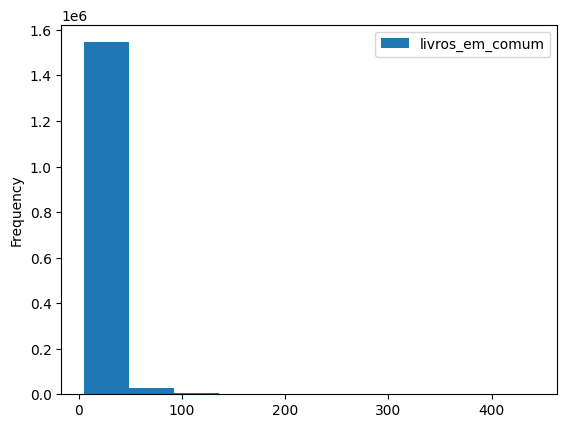

In [ ]:
grafo_count_df[grafo_count_df.livros_em_comum >=5].plot.hist()

<Axes: >

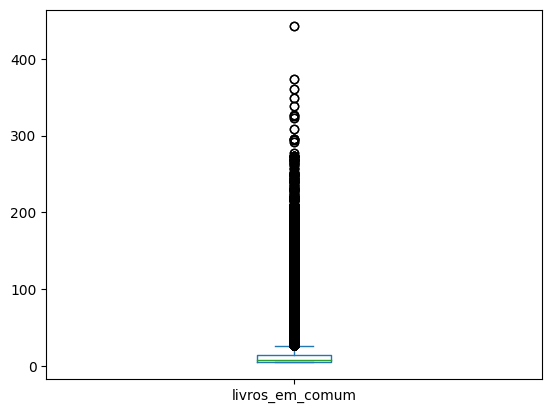

In [ ]:
grafo_count_df[grafo_count_df.livros_em_comum >=5].plot.box()

In [27]:
ids = grafo_count_df[grafo_count_df.livros_em_comum>8].ID1
ids

0      10127
1       4693
2       4746
3       7268
4        667
5        675
6       2129
7       2042
8       2042
9       9670
10     10127
11      9956
12      2042
13     10127
14      9670
15      4693
16      3769
17     10127
18      4693
19      3769
20      9670
21     10127
22      7328
23     10127
24       882
25       675
26      4693
27      9956
28       166
29       675
30       529
31       529
32      4693
33      2042
34      7560
35      4806
36       166
37       284
38      9956
39      9670
40       882
41       166
42      7452
43      7632
44       882
45      7328
46       675
47       284
48      2042
49       284
50      9670
51      7328
52       338
53      1393
54      4128
55       675
56       675
57       338
58      3485
59       284
60       675
61       166
62      9956
63      2042
64      2042
65      8176
66      8835
67      3485
68       338
69       284
70      4196
71      4806
72       675
73      3544
74       882
75      4806
76      4806

In [28]:
ids_count = grafo_count_df.groupby('ID1').livros_em_comum.count().reset_index()
ids_count = ids_count[ids_count.ID1.isin(ids.to_numpy())]
ids_count

/content/spark-3.5.0-bin-hadoop3/python/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning:

`to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.



,ID1,livros_em_comum
0,1572,2670
1,675,3291
2,2904,2799
3,3959,1927
4,10436,2225
5,2088,2497
7,4937,2743
8,9009,1537
9,3210,1445
20,451,1782


In [29]:
grafo_count_df['dist'] = 100 / grafo_count_df.livros_em_comum

In [30]:
grafo_count_df.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 5410760 entries, 0 to 5410759
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   ID1              5410760 non-null  object 
 1   ID2              5410760 non-null  object 
 2   livros_em_comum  5410760 non-null  int64  
 3   dist             5410760 non-null  float64
dtypes: float64(1), int64(1), object(2)

In [34]:
df_tografo = grafo_count_df[grafo_count_df.livros_em_comum >8]
df_tografo.head()

,ID1,ID2,livros_em_comum,dist
0,10127,4693,442,0.226244
1,4693,10127,442,0.226244
2,4746,7268,374,0.267380
3,7268,4746,374,0.267380
4,667,675,361,0.277008


In [42]:
df_grafo = grafo_count.toPandas()
df_grafo.head()

,ID1,ID2,livros_em_comum
0,10127,4693,442
1,4693,10127,442
2,4746,7268,374
3,7268,4746,374
4,667,675,361


In [43]:
df_grafo['dist'] = 100 / df_grafo.livros_em_comum

In [45]:
df_grafo = df_grafo[df_grafo.livros_em_comum >8]


In [46]:
G = nx.from_pandas_edgelist(df_grafo, source='ID1', target='ID2', edge_attr= ["dist"])

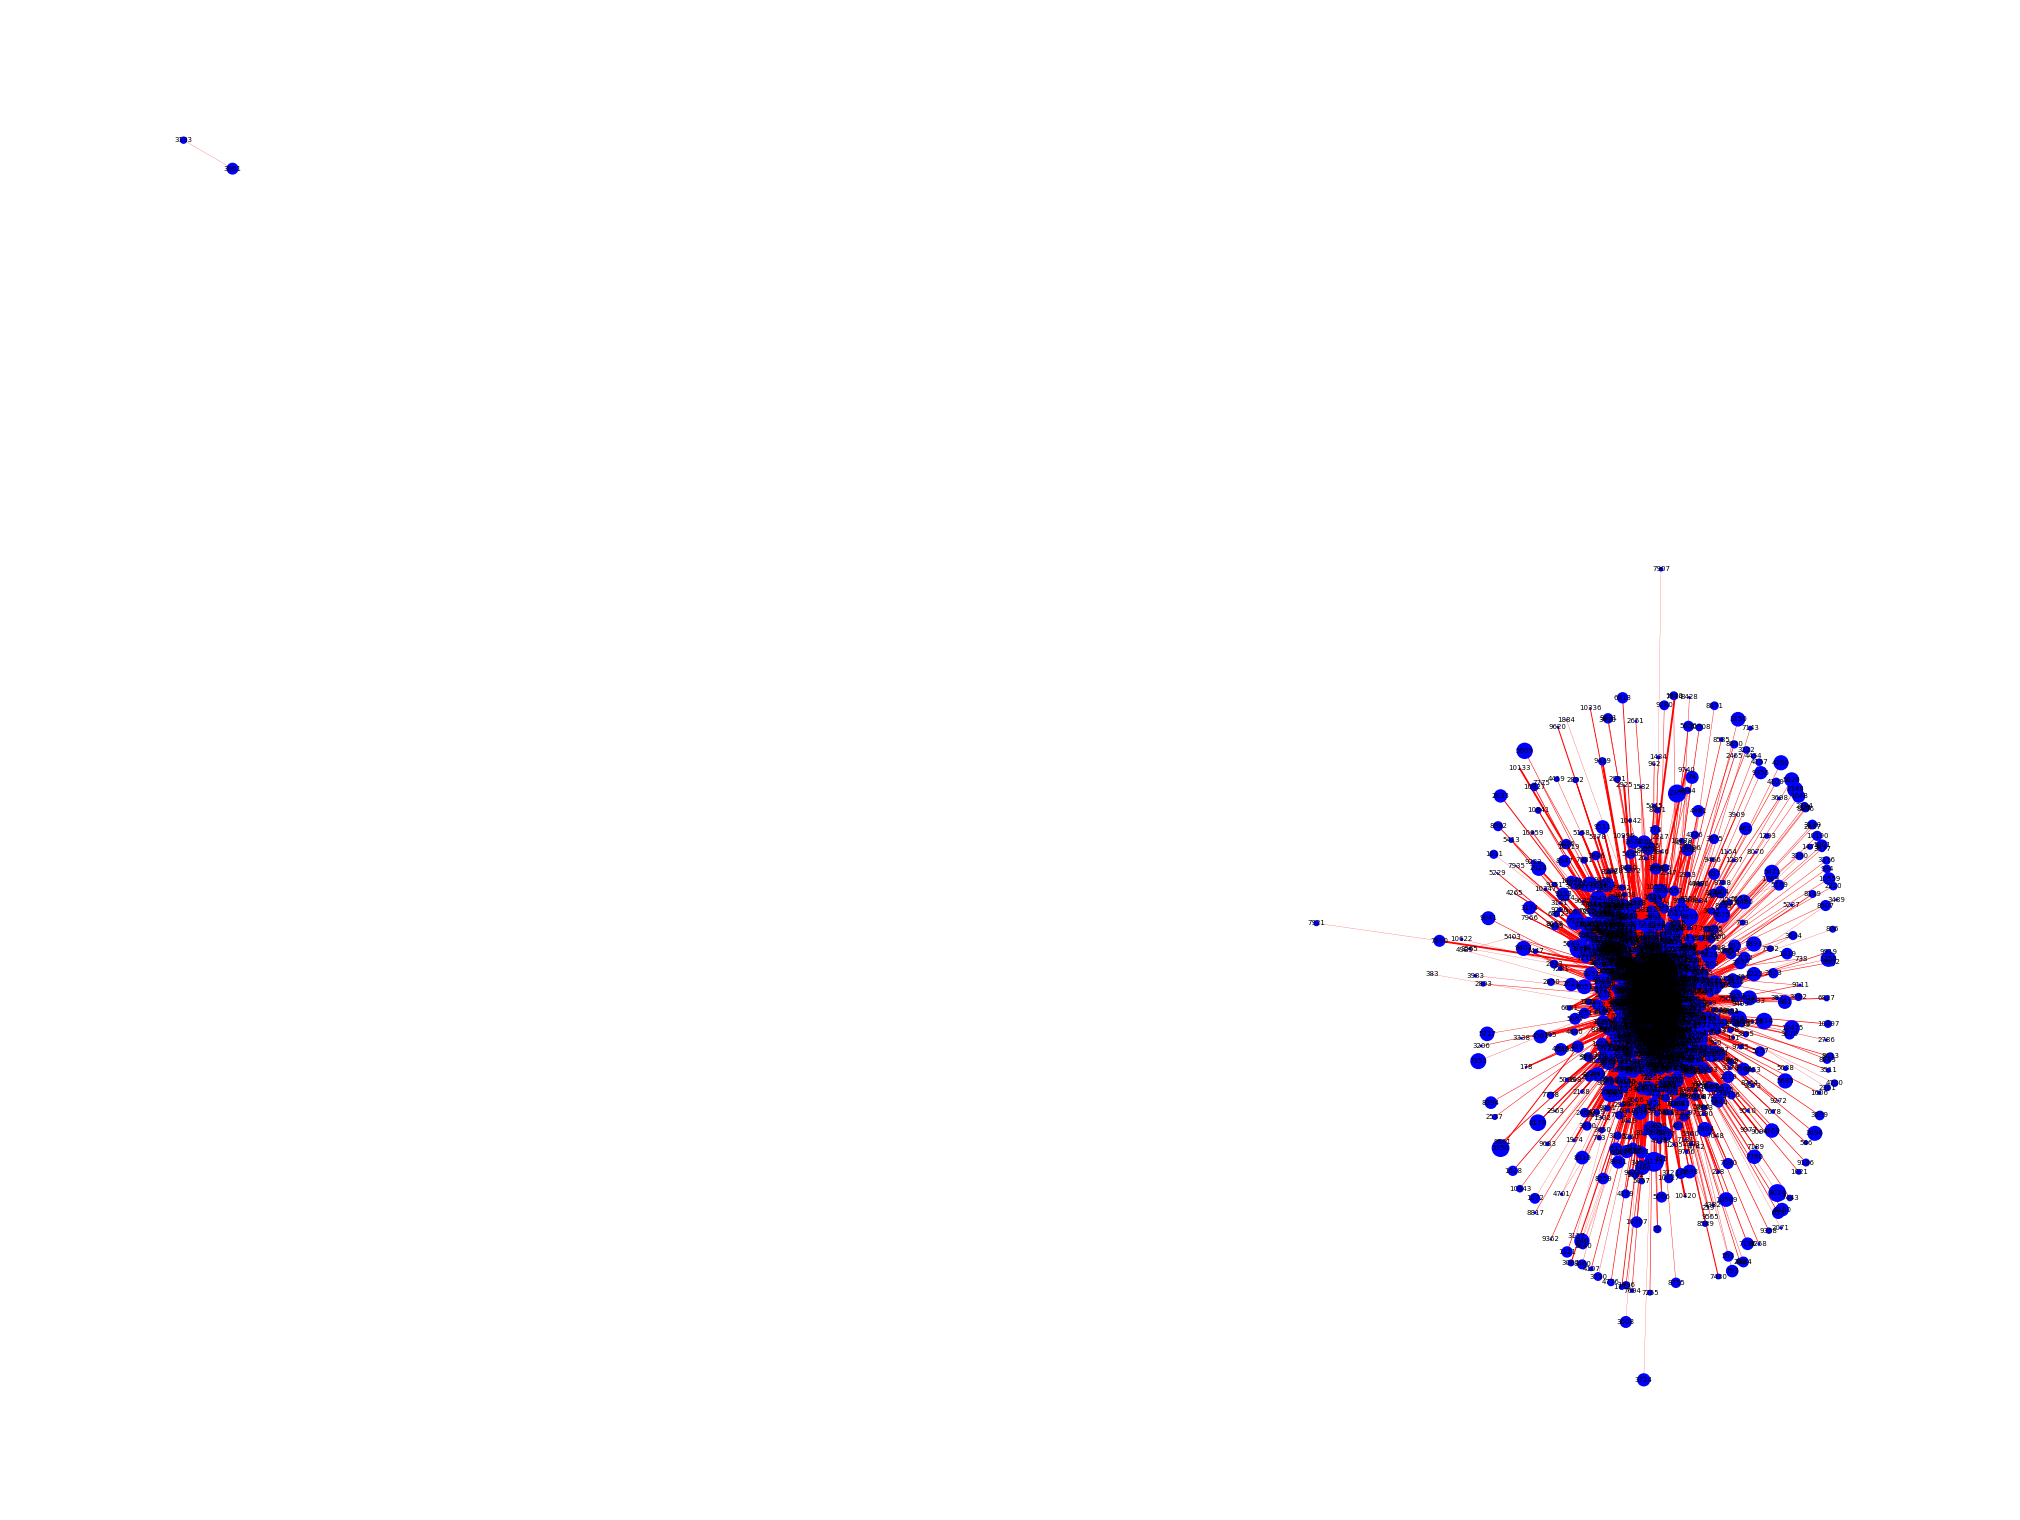

In [48]:
plt.figure(figsize=(20,15))
nx.draw(G, with_labels = True,
        node_size = df_grafo.groupby('ID1').livros_em_comum.count() / 10,
        font_size = 5, edge_color = "red",
        width = np.divide(df_grafo.livros_em_comum, 100),
        node_color = 'blue')

### Similaridade dos livros

In [ ]:
grafo_livros = spark.sql("""
                          select A.Name as livro1, B.Name as livro2, A.ID
                           from novo_user_rating as A
                           join novo_user_rating as B
                            on A.ID = B.ID and A.Name != B.Name

                                """)
grafo_livros.show()

+--------------------+--------------------+---+
|              livro1|              livro2| ID|
+--------------------+--------------------+---+
|The Fourth Indust...| Memoirs of a Geisha|100|
|The Fourth Indust...|      Les Misérables|100|
|The Fourth Indust...|America (The Book...|100|
|The Fourth Indust...|  Gone with the Wind|100|
|The Fourth Indust...| Pride and Prejudice|100|
|The Fourth Indust...|    The Great Gatsby|100|
|The Fourth Indust...|Social Intelligen...|100|
|The Fourth Indust...|Outliers: The Sto...|100|
|The Fourth Indust...|    Romeo and Juliet|100|
|The Fourth Indust...|          Steve Jobs|100|
|The Fourth Indust...|Emotional Intelli...|100|
|The Fourth Indust...|Harry Potter and ...|100|
|The Fourth Indust...|Clean: The Revolu...|100|
|The Fourth Indust...|The Virgin Way: E...|100|
|The Fourth Indust...|   House of God, The|100|
|The Fourth Indust...|So Good They Can'...|100|
|The Fourth Indust...|Linchpin: Are You...|100|
|The Fourth Indust...|Good to Great: Wh.

* Usuários em comum nos livros
  - Nota-se que os livros "The Great Gatsby" e "The Catcher in the Rye" apresentam a maior qtde de avaliadores em comum
  - Eles são seguidos pelos diversos livros da saga Harry Potter

In [ ]:
grafo_count_livros = grafo_livros.groupBy(['livro1', 'livro2']).agg(f.count('*').alias("usuarios_em_comum"))
grafo_count_livros = grafo_count_livros.orderBy(grafo_count_livros.usuarios_em_comum.desc())
grafo_count_livros.show()

+--------------------+--------------------+-----------------+
|              livro1|              livro2|usuarios_em_comum|
+--------------------+--------------------+-----------------+
|    The Great Gatsby|The Catcher in th...|              601|
|The Catcher in th...|    The Great Gatsby|              601|
|Harry Potter and ...|Harry Potter and ...|              589|
|Harry Potter and ...|Harry Potter and ...|              589|
|Harry Potter and ...|Harry Potter and ...|              569|
|Harry Potter and ...|Harry Potter and ...|              569|
|Harry Potter and ...|Harry Potter and ...|              566|
|Harry Potter and ...|Harry Potter and ...|              566|
|Harry Potter and ...|Harry Potter and ...|              564|
|Harry Potter and ...|Harry Potter and ...|              564|
|To Kill a Mocking...|    The Great Gatsby|              554|
|    The Great Gatsby|To Kill a Mocking...|              554|
|Harry Potter and ...|Harry Potter and ...|              547|
|Harry P

In [ ]:
grafo_count_livros.summary().show()

+-------+--------------------+--------------------+------------------+
|summary|              livro1|              livro2| usuarios_em_comum|
+-------+--------------------+--------------------+------------------+
|  count|            62582174|            62582174|          62582174|
|   mean|            Infinity|            Infinity|1.5399306518178804|
| stddev|                 NaN|                 NaN| 2.558287084347696|
|    min|"""A Problem from...|"""A Problem from...|                 1|
|    25%|              1812.0|              1812.0|                 1|
|    50%|              1984.0|              1984.0|                 1|
|    75%|              1984.0|              1984.0|                 1|
|    max|フルーツバスケット 1|フルーツバスケット 1|               601|
+-------+--------------------+--------------------+------------------+



In [ ]:
grafo_count_livros_df = grafo_count_livros.pandas_api()

In [ ]:
grafo_count_livros_df.describe()

,usuarios_em_comum
count,6.258217e+07
mean,1.539931e+00
std,2.558287e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,6.010000e+02


In [ ]:
grafo_count_livros_df.usuarios_em_comum.plot.hist()

In [ ]:
grafo_count_livros_df.usuarios_em_comum.plot.box()

### Sistema de Recomendação

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

In [ ]:
SEED = 88

In [ ]:
novo_user_rating.show()

+----+--------------------+---------------+----+
|  ID|                Name|         Rating|Nota|
+----+--------------------+---------------+----+
|6675|Set This House in...|really liked it|   4|
|6675|       Paradise Park|really liked it|   4|
|7027|       Paradise Park|       liked it|   3|
|6675|The Dead Fish Museum| it was amazing|   5|
|7360|The Dead Fish Museum|      it was ok|   2|
|6675|  School of the Arts|really liked it|   4|
|8692|  School of the Arts|really liked it|   4|
|6675|Butterfly Boy: Me...|       liked it|   3|
|7965|Butterfly Boy: Me...| it was amazing|   5|
|6675|           Dog Years|really liked it|   4|
|9642|           Dog Years|       liked it|   3|
|6675|     Beyond the Pale|really liked it|   4|
|7182|     Beyond the Pale| it was amazing|   5|
|6675|No One Belongs He...|really liked it|   4|
|6765|No One Belongs He...|really liked it|   4|
|6804|No One Belongs He...|really liked it|   4|
|7099|No One Belongs He...| it was amazing|   5|
|7582|No One Belongs

In [ ]:
novo_user_rating.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Nota: integer (nullable = false)



In [ ]:
treino, teste = novo_user_rating.randomSplit([0.7, 0.3], seed=SEED)

#### Pipeline

In [ ]:
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
stages = []

In [ ]:
string_indexer = StringIndexer(inputCol='Name', outputCol="livro_idx", handleInvalid='keep')
stages += [string_indexer]

string_indexer = StringIndexer(inputCol='ID', outputCol="user_idx", handleInvalid='keep')
stages += [string_indexer]

In [ ]:
als = ALS(seed=SEED, userCol="user_idx",
          itemCol="livro_idx", ratingCol="Nota", coldStartStrategy='drop')

stages += [als]

In [ ]:
pipeline = Pipeline(stages=stages)

#### Grid Search

In [ ]:
grid = ParamGridBuilder()\
        .addGrid(als.maxIter, [2, 5, 10])\
        .addGrid(als.regParam, [.05, .1, .15])\
        .addGrid(als.rank, [5, 10, 15])\
        .addGrid(als.alpha, [2.0,3.0]) \
        .build()

evaluator = RegressionEvaluator(metricName="rmse", labelCol="Nota", predictionCol="prediction")

als_cv = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=5,
    seed=SEED,
    parallelism=2
)

modelo_als_cv = als_cv.fit(treino)

print(modelo_als_cv)

best_model = modelo_als_cv.bestModel

print(best_model)

CrossValidatorModel_96cbbf7b4071
PipelineModel_d9b80c47cc68


In [ ]:
best_model.stages

[StringIndexerModel: uid=StringIndexer_5ccaf434b43b, handleInvalid=keep,
 StringIndexerModel: uid=StringIndexer_42d013d307ae, handleInvalid=keep,
 ALSModel: uid=ALS_2b917ee77bff, rank=5]

In [ ]:
print('rank: ', best_model.rank)
print('MaxIter: ', best_model._java_obj.parent().getMaxIter())
print('RegParam: ', best_model._java_obj.parent().getRegParam())
print('Alpha: ', best_model._java_obj.parent().getAlpha())

AttributeError: ignored

In [ ]:
print('rank: ', best_model.stages[-1].rank)

rank:  5


In [ ]:
predictions = best_model.transform(teste)
predictions.show()

+-----+--------------------+---------------+----+---------+--------+----------+
|   ID|                Name|         Rating|Nota|livro_idx|user_idx|prediction|
+-----+--------------------+---------------+----+---------+--------+----------+
|10000|      As I Lay Dying|really liked it|   4|    227.0|  3182.0| 4.1311374|
|10013|  Gone with the Wind|really liked it|   4|     78.0|  1648.0| 5.0070024|
|10013|Harry Potter and ...| it was amazing|   5|      9.0|  1648.0| 4.8751035|
|10013|The Adventures of...|really liked it|   4|     23.0|  1648.0| 4.1658945|
|10013|       The Alchemist| it was amazing|   5|     10.0|  1648.0|  4.054735|
|10014|A Brief History o...|       liked it|   3|    940.0|  1180.0|  3.369792|
|10014|         Animal Farm|really liked it|   4|      7.0|  1180.0| 3.3023393|
|10014|     Daddy-Long-Legs|      it was ok|   2|    527.0|  1180.0| 3.8733034|
|10014|Dear Enemy (Daddy...|      it was ok|   2|    719.0|  1180.0| 3.2225955|
|10014|Girl with a Pearl...|      it was

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

Root-mean-square error = 0.9878244752662326


In [ ]:
# sem cross: Root-mean-square error = 1.06723331502783

#### Recomendando 5 livros para cada usuário

* 5 recomendações para cada usuário

In [ ]:
user_recs = best_model.stages[-1].recommendForAllUsers(5)

In [ ]:
user_recs.show()

+--------+--------------------+
|user_idx|     recommendations|
+--------+--------------------+
|       1|[{27501, 5.801048...|
|       3|[{27501, 5.555565...|
|       5|[{29743, 5.259114...|
|       6|[{31369, 5.992210...|
|       9|[{21544, 5.973442...|
|      12|[{27501, 5.895015...|
|      13|[{27501, 5.576374...|
|      15|[{27501, 5.637476...|
|      16|[{30290, 4.9315},...|
|      17|[{27501, 5.537238...|
|      19|[{27501, 5.2714},...|
|      20|[{21544, 5.770547...|
|      22|[{32582, 5.017752...|
|      26|[{27501, 5.473796...|
|      27|[{27501, 5.037412...|
|      28|[{27501, 6.583398...|
|      31|[{27501, 6.194645...|
|      34|[{19525, 5.818879...|
|      35|[{22434, 5.245321...|
|      37|[{17821, 5.3157},...|
+--------+--------------------+
only showing top 20 rows



In [ ]:
user_recs.where(user_recs.user_idx == 1).select("recommendations.livro_idx", "recommendations.rating").collect()

[Row(livro_idx=[27501, 30290, 25439, 26344, 19484], rating=[5.801048278808594, 5.781607151031494, 5.781607151031494, 5.722066879272461, 5.623191833496094])]

O usuário user_idx 1 tem o ID de 27501 e o livro mais indicado para ele é A Bíblia

In [ ]:
predictions[predictions.user_idx == 1].show()

+---+--------------------+---------------+----+---------+--------+----------+
| ID|                Name|         Rating|Nota|livro_idx|user_idx|prediction|
+---+--------------------+---------------+----+---------+--------+----------+
|284|A Breath of Snow ...|really liked it|   4|   1322.0|     1.0| 3.8698473|
|284|A Brief History o...|really liked it|   4|   1187.0|     1.0|  4.122728|
|284|A Chair for My Mo...| it was amazing|   5|  25422.0|     1.0| 3.8091679|
|284|   A Christmas Carol| it was amazing|   5|    487.0|     1.0| 3.9718335|
|284|A Cold Trail (Tra...|       liked it|   3|  25428.0|     1.0| 2.6441743|
|284|A Connecticut Yan...|really liked it|   4|   1614.0|     1.0| 3.8682342|
|284|A Fairly Honourab...| it was amazing|   5|  25450.0|     1.0| 3.9841723|
|284|  A Farewell to Arms| it was amazing|   5|    139.0|     1.0| 3.9909558|
|284|A Game of Ghosts ...|really liked it|   4|  25462.0|     1.0|  4.219927|
|284|A Head Full of Gh...| it was amazing|   5|   6672.0|     1.

In [ ]:
predictions[predictions.livro_idx == 27501].show()

+----+--------------------+---------+----+---------+--------+----------+
|  ID|                Name|   Rating|Nota|livro_idx|user_idx|prediction|
+----+--------------------+---------+----+---------+--------+----------+
|8664|Holy Bible: Revis...|it was ok|   2|  27501.0|   775.0|  5.166258|
+----+--------------------+---------+----+---------+--------+----------+



#### Recomendando 5 usuários para cada livro

In [ ]:
item_recs = best_model.stages[-1].recommendForAllItems(5)
item_recs.show()

+---------+--------------------+
|livro_idx|     recommendations|
+---------+--------------------+
|        1|[{3649, 5.5614834...|
|        3|[{3649, 6.109261}...|
|        5|[{3649, 5.8911853...|
|        6|[{3649, 5.6365614...|
|        9|[{3649, 5.9708962...|
|       12|[{3649, 5.3057375...|
|       13|[{3649, 5.994162}...|
|       15|[{3649, 4.9821796...|
|       16|[{3649, 5.789899}...|
|       17|[{3649, 5.8613195...|
|       19|[{3157, 6.0870237...|
|       20|[{3649, 5.3998003...|
|       22|[{3157, 5.5467634...|
|       26|[{3649, 6.3179345...|
|       27|[{3157, 5.4025493...|
|       28|[{3649, 5.627532}...|
|       31|[{3649, 5.55262},...|
|       34|[{3313, 5.0156384...|
|       35|[{3649, 6.109635}...|
|       37|[{3649, 5.568961}...|
+---------+--------------------+
only showing top 20 rows



In [ ]:
item_recs.where(item_recs.livro_idx == 1).select("recommendations.user_idx", "recommendations.rating").collect()

[Row(user_idx=[3649, 3313, 3157, 3239, 3011], rating=[5.561483383178711, 5.493845462799072, 5.4774956703186035, 5.310084819793701, 5.284161567687988])]

O livro "The Great Gatsby" tem a recomendação mais forte para um usuário que ainda não avaliou nenhum livro e depois para o usuário ID 5084

In [ ]:
predictions[predictions.livro_idx == 1].show()

+----+----------------+---------------+----+---------+--------+----------+
|  ID|            Name|         Rating|Nota|livro_idx|user_idx|prediction|
+----+----------------+---------------+----+---------+--------+----------+
|2139|The Great Gatsby|       liked it|   3|      1.0|   251.0| 3.5230117|
|2229|The Great Gatsby| it was amazing|   5|      1.0|  1458.0|  3.592723|
|2282|The Great Gatsby|      it was ok|   2|      1.0|   324.0| 3.7549438|
|2296|The Great Gatsby|       liked it|   3|      1.0|   119.0|  4.023753|
|2429|The Great Gatsby|really liked it|   4|      1.0|  1459.0| 2.9743984|
|2450|The Great Gatsby|really liked it|   4|      1.0|  2164.0|  4.287119|
|2452|The Great Gatsby| it was amazing|   5|      1.0|   519.0| 4.1871424|
|2496|The Great Gatsby| it was amazing|   5|      1.0|  3240.0| 3.6382034|
|2581|The Great Gatsby| it was amazing|   5|      1.0|   336.0| 3.8119478|
|2621|The Great Gatsby|really liked it|   4|      1.0|  2238.0| 4.2306175|
|2649|The Great Gatsby|  

In [ ]:
predictions[predictions.user_idx == 3649].show()

+---+----+------+----+---------+--------+----------+
| ID|Name|Rating|Nota|livro_idx|user_idx|prediction|
+---+----+------+----+---------+--------+----------+
+---+----+------+----+---------+--------+----------+



In [ ]:
predictions[predictions.user_idx == 3313].show()

+----+-----------------+---------------+----+---------+--------+----------+
|  ID|             Name|         Rating|Nota|livro_idx|user_idx|prediction|
+----+-----------------+---------------+----+---------+--------+----------+
|5084|            Naked| it was amazing|   5|     57.0|  3313.0|  4.903318|
|5084|The Little Friend|really liked it|   4|    908.0|  3313.0| 3.2189026|
+----+-----------------+---------------+----+---------+--------+----------+

